# Clasificadores generativos: Inferencia bayesiana

Los clasificadores **discriminativos** como el clasificador geométrico por mínimos cuadrados que vimos la clase pasada, se enfocan en modelar la frontera de decisión. Recordemos que una frontera de decisión lineal está dada por:
\begin{equation}
\boldsymbol{w}^T \boldsymbol{x} = 0
\end{equation}
y el entrenamiento del clasificador se reduce a encontrar los valores del vector $\boldsymbol{w}$ que separen correctamente los datos de entrenamiento.


Existe otro enfoque para el aprendizaje que consiste en no modelar la frontera de decisión directamente, sino en construir un modelo para los datos de cada una de las clases y permitir que la frontera de decisión aparezca naturalmente. Este tipo de clasificador se denomina **generativo**.

Una forma de modelar los datos consiste en utilizar modelos probabilísticos. Para esto, supondremos que los datos tienen una función de densidad de probabilidad en particular, que nos permita realizar inferencias basándonos en el teorema de Bayes:

\begin{equation}
p(y|x) = \frac{p(x|y)p(y)}{p(x)}
\end{equation}

En esta ecuación, cada uno de los elementos que intervienen tienen un nombre específico:

\begin{equation}
posterior = \frac{(verosimilutud)(prior)}{evidencia}
\end{equation}

Consideremos un ejemplo:

Supongamos que la prueba rápida de Covid-19 tiene una especificidad del 90% (da negativo un 90% de las veces que se haga una prueba a alguien sano). Supongamos que a una persona sin síntomas, se le hace una prueba rápida y sale positiva. ¿Cuál será la probabilidad de que esté sano?

En este problema tenemos dos variables aleatorias (las llamamos aleatorias porque tienen una cantidad de incertidumbre que no nos permite predecirlas):

\begin{equation}
paciente = \left\{ \begin{array}{l}
S, \text{sano}\\
E, \text{enfermo}
\end{array}\right.
\end{equation}

\begin{equation}
prueba = \left\{ \begin{array}{l}
P, \text{positiva}\\
N, \text{negativa}
\end{array}\right.
\end{equation}

Como estamos interesados en conocer la probabilidad de que el paciente esté sano (aún cuando la prueba fue positiva), eso quiere decir que queremos conocer $p(paciente=S | prueba = P)$: 

\begin{equation}
p(paciente=S|prueba=P) = \frac{p(prueba=P|paciente=S)p(paciente=S)}{p(prueba=P)}
\end{equation}

O simplificando la notación:

\begin{equation}
p(S|P) = \frac{p(P|S)p(S)}{p(P)}
\end{equation}

A $p(S)$ lo llamamos *prior* y representa nuestro conocimiento de la situación antes de hacer las pruebas. ¿Cuál es la cantidad de personas sanas? El 9 de noviembre de 2020, se conoce que en Manizales hay $7182$ casos activos confirmados. Si queremos ser más realistas, sabemos que hay una cantidad de casos asintomáticos que (suponiendo que pasa lo mismo que con el virus de la influenza) puede llegar a ser de un 80% en el peor de los casos (Hsieh et al., 2014). Entonces tendríamos que el número de enfermos en este momento puede ser de: 

\begin{equation}
\frac{7182*100}{20} = 35910
\end{equation}

Si el número de enfermos en Manizales (incluyendo los casos confirmados y los asintomáticos puede llegar a ser de 35910, y según el último senso somos en total $434403$ habitantes, tendíamos $398493$ personas sanas. Por lo tanto, la probabilidad de estar sano sería:

\begin{equation}
p(S)=\frac{398493}{434403} = 0.9173
\end{equation}

Esto quiere decir que *a priori*, es muy probable que estemos sanos. 

A $p(P|S)$ lo llamamos *verosimilitud* (credibilidad) y nos dice qué tan creible es la prueba. Ya sabemos que tiene una especificidad del 90%, es decir, que puede sacar un resultado errado en un 10% de las veces. Por lo tanto:

\begin{equation}
p(P|S)=0.1
\end{equation}

Finalmente, $p(P)$ se llama la *evidencia* y muestra la probabilidad de que una prueba sea positiva (a pesar de que no sepamos si en realidad el paciente estaba enfermo o fue un falso positivo). Tomaré como evidencia los datos del INS para el 11 de noviembre de 2020: 

* Pruebas de antígeno procesadas: $997206$
* Pruebas de antígeno positivas: $191016$

Por lo tanto:

\begin{equation}
p(P)=\frac{191016}{997206} = 0.1915
\end{equation}

Podemos entonces aplicar el teorema de Bayes:

\begin{equation}
p(S|P) = \frac{p(P|S)p(S)}{p(P)} = \frac{0.1*0.9173}{0.1915} = 0.479
\end{equation}

Así que, en caso de dar positivo en una prueba rápida, ¡todavía tenemos casi el 50% de la probabilidad de que sea un error!

* Hsieh Y., Tsai C., Lin C. "Asymptomatic ratio for seasonal H1N1 influenza infection among schoolchildren in Taiwan". *BMC Infect Dis*. 2014;14:80. doi: 10.1186/1471-2334-14-80.


¿Cómo usamos este método de inferencia para entrenar un clasificador?

Reescribimos el teorema de Bayes en función de las muestras y las clases:

\begin{equation}
p(clase=c_i|muestra = \boldsymbol{x}) = \frac{p(muestra = \boldsymbol{x}|clase=c_i)p(clase=c_i)}{p(muestra=\boldsymbol{x})}
\end{equation}

Nuevamente simplificando la notación:

\begin{equation}
p(c_i|\boldsymbol{x}) = \frac{p(\boldsymbol{x}|c_i)p(c_i)}{p(\boldsymbol{x})}
\end{equation}

Entonces lo que hacemos es iterar por todas las clases y encontrar la probabilidad más alta. Suponiendo que la única característica de nuestras muestras ($\boldsymbol{x}$) sea el color, podríamos tener algo como:

\begin{equation}
p(limón|verde) = \frac{p(verde|limón)p(limón)}{p(verde)}
\end{equation}

\begin{equation}
p(naranja|verde) = \frac{p(verde|naranja)p(naranja)}{p(verde)}
\end{equation}

\begin{equation}
p(manzana|verde) = \frac{p(verde|manzana)p(manzana)}{p(verde)}
\end{equation}

¿Cuál será la maś alta? Es importante notar que el denominador es el mismo en todos los casos, así que desde el punto de vista de clasificación, nos podemos quedar sólo con el numerador.

Ahora, cuando no tenemos valores discretos sino continuos, lo que hacemos para definir la verosimilitud es escoger una función de densidad de probabilidad. Lo más usual es utilizar la función de probabilidad Gaussiana:

\begin{equation}
p(\boldsymbol{x}|c_i) = \frac{1}{\sqrt{(2\pi)^k |\Sigma_i|}}e^{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu}_i)^T \Sigma_i^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_i)}
\end{equation}

donde $\boldsymbol{\mu}_i$ es la media de la clase $c_i$ y $\Sigma_i$ es la matriz de covarianza de esa clase.

Consideremos nuevamente la base de datos Iris, tomando solamente dos clases:

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
# Importamos la base de datos iris
iris = datasets.load_iris()

# Tomamos las dos primeras características (150 muestras, 2 características)
X = iris.data[0:100:, :2]
y = iris.target[0:100]
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

Veamos cuál es la media de cada clase:

In [1]:
import numpy as np
setosa=np.array(X[0:50,:]);
versicolor=np.array(X[50:100,:]);
print(np.mean(setosa,axis=0))
print(np.mean(versicolor,axis=0))

ModuleNotFoundError: No module named 'numpy'

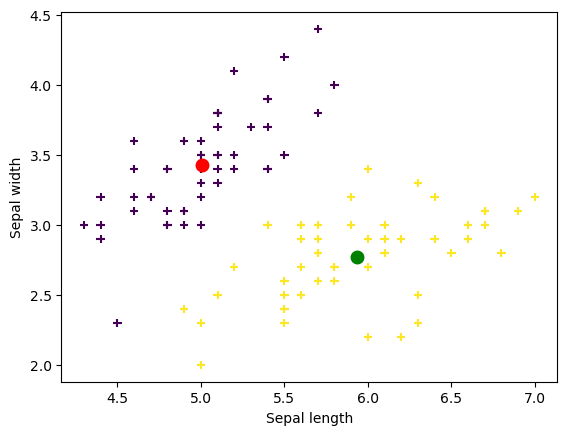

[[0.12424898 0.09921633]
 [0.09921633 0.1436898 ]]


In [5]:
plt.scatter(X[:, 0], X[:, 1],c=y,marker='+')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(5.006,3.428,c='red',marker='o',linewidths=4)
plt.scatter(5.936,2.77,c='green',marker='o',linewidths=4)
plt.show()
cset=np.cov(np.transpose(setosa))
print(cset)

Ahora veamos cómo sería el entrenamiento:

In [7]:
mset=np.mean(setosa,axis=0) #Medias
mver=np.mean(versicolor,axis=0)
cset=np.cov(np.transpose(setosa)) #Matrices de covarianza. Transponemos la matriz porque numpy espera las variables en las columnas
cver=np.cov(np.transpose(versicolor))
campana_set=lambda x:(1/(np.sqrt(((2*np.pi)**2)*np.linalg.det(cset))))* (np.exp(-1/2*((x-mset).dot(np.linalg.inv(cset))).dot(np.transpose(x-mset)))) 
campana_ver=lambda x:(1/(np.sqrt(((2*np.pi)**2)*np.linalg.det(cver))))* (np.exp(-1/2*((x-mver).dot(np.linalg.inv(cver))).dot(np.transpose(x-mver)))) 
#Hasta aquí llega el entrenamiento
prueba=np.array([6.5,2.7])
print(campana_set(prueba))
print(campana_ver(prueba))

8.284944537137172e-17
0.4096522103748518


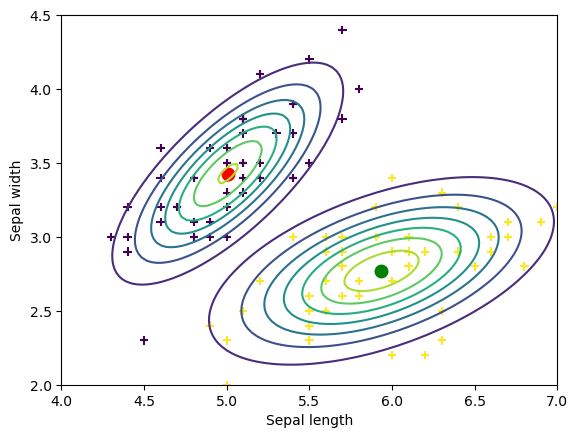

In [8]:
#Veamos las campanas gaussianas
x1, x2 = np.meshgrid(np.linspace(4,7,100),np.linspace(2,4.5,100))
gauss_set = np.zeros(shape=(len(x1),len(x2)))
gauss_ver = np.zeros(shape=(len(x1),len(x2)))
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j]])
        gauss_set[i,j]=campana_set(x)
        gauss_ver[i,j]=campana_ver(x)

plt.scatter(X[:, 0], X[:, 1],c=y,marker='+')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
h1 = plt.contour(x1,x2,gauss_set)
h2 = plt.contour(x1,x2,gauss_ver)
plt.scatter(5.006,3.428,c='red',marker='o',linewidths=4)
plt.scatter(5.936,2.77,c='green',marker='o',linewidths=4)



¿Y cómo se hace en sklearn?
Se importa el clasificador Gaussian Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, y)
test=np.array([[4.5,2.3]]) #Prueba
clf.predict(test)